In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import math

In [2]:
dfCDCW=pd.read_excel('CDCW_cleaned.xlsx',parse_dates=['Month'], index_col='Month')

In [3]:
dfGST=pd.read_excel('GST_cleaned.xlsx')

In [4]:
dfSSBB=pd.read_excel('SSBB_cleaned.xlsx')

In [5]:
dfSSGB=pd.read_excel('SSGB_cleaned.xlsx')

In [6]:
dfAnalytics=pd.read_excel('Analytics_cleaned.xlsx')

In [7]:
dfPMP=pd.read_excel('PMP_cleaned.xlsx')

In [8]:
CDCW=pd.pivot_table(dfCDCW,['Fees Received'], index=['Month'],aggfunc=np.sum)
CDCW = CDCW.rename(columns={CDCW.columns[0]: 'CDCW'})

In [9]:
GST=pd.pivot_table(dfGST,['Fees Received'], index=['Month'],aggfunc=np.sum)
GST = GST.rename(columns={GST.columns[0]: 'GST'})

In [10]:
SSBB=pd.pivot_table(dfSSBB,['Fees Received'], index=['Month'],aggfunc=np.sum)
SSBB = SSBB.rename(columns={SSBB.columns[0]: 'SSBB'})

In [11]:
SSGB=pd.pivot_table(dfSSGB,['Fees Received'], index=['Month'],aggfunc=np.sum)
SSGB = SSGB.rename(columns={SSGB.columns[0]: 'SSGB'})

In [12]:
Analytics=pd.pivot_table(dfAnalytics,['Fees Received'], index=['Month'],aggfunc=np.sum)
Analytics = Analytics.rename(columns={Analytics.columns[0]: 'Analytics'})

In [13]:
PMP=pd.pivot_table(dfPMP,['Fees Received'], index=['Month'],aggfunc=np.sum)
PMP = PMP.rename(columns={PMP.columns[0]: 'PMP'})

In [14]:
#Fees Received in various courses
df = pd.concat([CDCW,GST,SSBB,SSGB,Analytics,PMP],axis=1)
df

,CDCW,GST,SSBB,SSGB,Analytics,PMP
Month,,,,,,
2020-04-01,897520,206200,334500,622500,NaN,NaN
2020-05-01,920085,320100,622000,835829,NaN,NaN
2020-06-01,1063722,332450,778400,697650,NaN,NaN
2020-07-01,1245974,264700,933800,925597,NaN,NaN
2020-08-01,1378387,491450,1083000,885231,NaN,NaN
2020-09-01,1053710,323500,786034,792149,NaN,NaN
2020-10-01,1320699,340775,1169400,810250,NaN,NaN
2020-11-01,1420899,448750,1319225,864950,NaN,105437.0
2020-12-01,1801340,479150,2243550,1166800,NaN,113750.0


In [15]:
df.sum()

CDCW         27714491.0
GST          14155540.0
SSBB         23173926.0
SSGB         17114629.0
Analytics      458943.0
PMP           2583262.0
dtype: float64

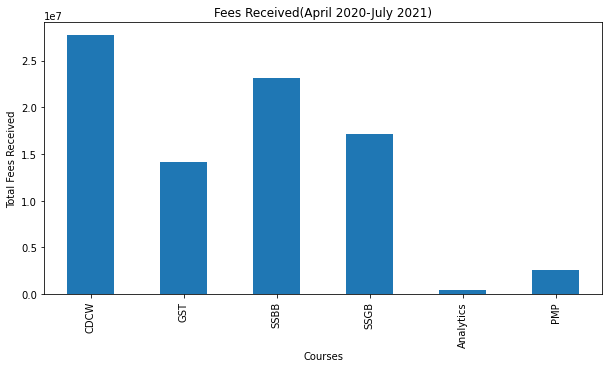

In [16]:
# Plotting and visualizing the counts
plt.figure(figsize=(10,5))
plt.title('Fees Received(April 2020-July 2021)')

plt.xlabel('Courses')
plt.ylabel('Total Fees Received')
df.sum().plot(kind = 'bar')

plt.show()

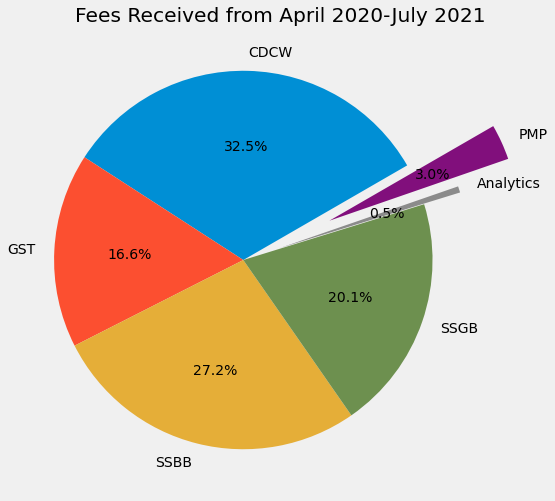

In [17]:
plt.style.use("fivethirtyeight")
labels = ['CDCW', 'GST', 'SSBB','SSGB','Analytics','PMP']
explode = [0, 0, 0, 0, 0.2, 0.5]

plt.figure(figsize=(8,8))
plt.pie(df.sum(), autopct='%1.1f%%',labels=labels, explode=explode, startangle=30, shadow = False)

plt.title("Fees Received from April 2020-July 2021")
plt.axis('equal')

plt.show()

<Figure size 432x288 with 0 Axes>

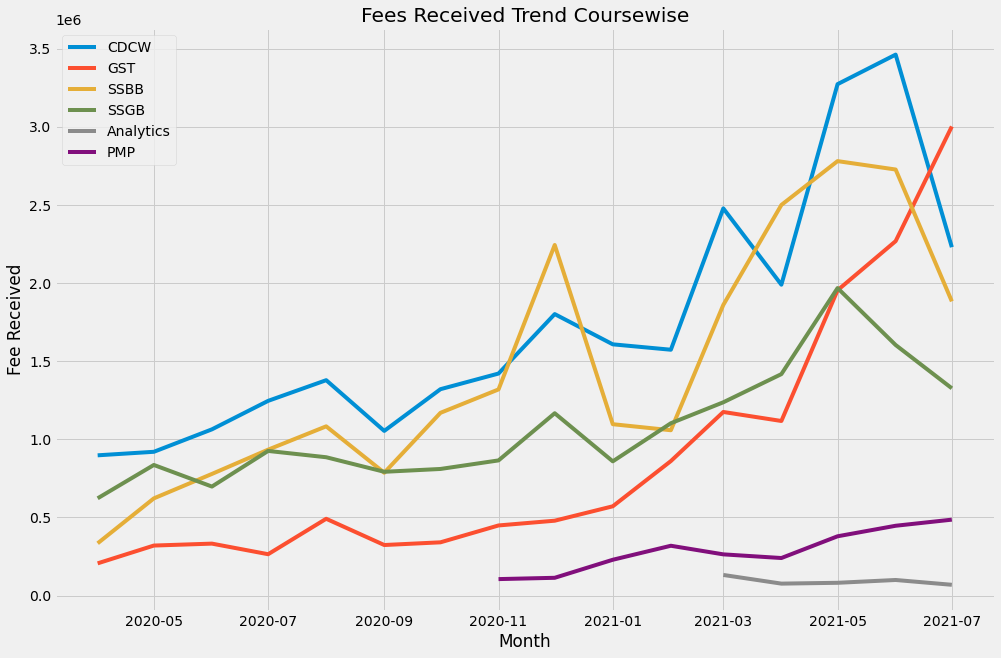

In [18]:
plt.figure( )
plt.figure(figsize=(15,10))
sns.lineplot(x='Month',y='CDCW',data=df,label='CDCW')
sns.lineplot(x='Month',y='GST',data=df,label='GST')
sns.lineplot(x='Month',y='SSBB',data=df,label='SSBB')
sns.lineplot(x='Month',y='SSGB',data=df,label='SSGB')
sns.lineplot(x='Month',y='Analytics',data=df,label='Analytics')
sns.lineplot(x='Month',y='PMP',data=df,label='PMP')

plt.xlabel( 'Month' )
plt.ylabel( 'Fee Received' )
plt.title('Fees Received Trend Coursewise' )
plt.legend (loc="upper left")
plt.show( )

In [19]:
df.head()

,CDCW,GST,SSBB,SSGB,Analytics,PMP
Month,,,,,,
2020-04-01,897520,206200,334500,622500,NaN,NaN
2020-05-01,920085,320100,622000,835829,NaN,NaN
2020-06-01,1063722,332450,778400,697650,NaN,NaN
2020-07-01,1245974,264700,933800,925597,NaN,NaN
2020-08-01,1378387,491450,1083000,885231,NaN,NaN


In [20]:
df.loc['Total']= df.sum()
df

,CDCW,GST,SSBB,SSGB,Analytics,PMP
Month,,,,,,
2020-04-01 00:00:00,897520.0,206200.0,334500.0,622500.0,NaN,NaN
2020-05-01 00:00:00,920085.0,320100.0,622000.0,835829.0,NaN,NaN
2020-06-01 00:00:00,1063722.0,332450.0,778400.0,697650.0,NaN,NaN
2020-07-01 00:00:00,1245974.0,264700.0,933800.0,925597.0,NaN,NaN
2020-08-01 00:00:00,1378387.0,491450.0,1083000.0,885231.0,NaN,NaN
2020-09-01 00:00:00,1053710.0,323500.0,786034.0,792149.0,NaN,NaN
2020-10-01 00:00:00,1320699.0,340775.0,1169400.0,810250.0,NaN,NaN
2020-11-01 00:00:00,1420899.0,448750.0,1319225.0,864950.0,NaN,105437.0
2020-12-01 00:00:00,1801340.0,479150.0,2243550.0,1166800.0,NaN,113750.0


In [21]:
df["Total Sales"] = df.sum(axis=1)
df = df.sort_values(by = 'Total', axis = 1,ascending=False)
df

,Total Sales,CDCW,SSBB,SSGB,GST,PMP,Analytics
Month,,,,,,,
2020-04-01 00:00:00,2060720.0,897520.0,334500.0,622500.0,206200.0,NaN,NaN
2020-05-01 00:00:00,2698014.0,920085.0,622000.0,835829.0,320100.0,NaN,NaN
2020-06-01 00:00:00,2872222.0,1063722.0,778400.0,697650.0,332450.0,NaN,NaN
2020-07-01 00:00:00,3370071.0,1245974.0,933800.0,925597.0,264700.0,NaN,NaN
2020-08-01 00:00:00,3838068.0,1378387.0,1083000.0,885231.0,491450.0,NaN,NaN
2020-09-01 00:00:00,2955393.0,1053710.0,786034.0,792149.0,323500.0,NaN,NaN
2020-10-01 00:00:00,3641124.0,1320699.0,1169400.0,810250.0,340775.0,NaN,NaN
2020-11-01 00:00:00,4159261.0,1420899.0,1319225.0,864950.0,448750.0,105437.0,NaN
2020-12-01 00:00:00,5804590.0,1801340.0,2243550.0,1166800.0,479150.0,113750.0,NaN


In [22]:
df.drop(df.tail(1).index,inplace=True) # drop last n rows

In [23]:
df.to_excel("All Sales.xlsx")

In [24]:
df

,Total Sales,CDCW,SSBB,SSGB,GST,PMP,Analytics
Month,,,,,,,
2020-04-01 00:00:00,2060720.0,897520.0,334500.0,622500.0,206200.0,NaN,NaN
2020-05-01 00:00:00,2698014.0,920085.0,622000.0,835829.0,320100.0,NaN,NaN
2020-06-01 00:00:00,2872222.0,1063722.0,778400.0,697650.0,332450.0,NaN,NaN
2020-07-01 00:00:00,3370071.0,1245974.0,933800.0,925597.0,264700.0,NaN,NaN
2020-08-01 00:00:00,3838068.0,1378387.0,1083000.0,885231.0,491450.0,NaN,NaN
2020-09-01 00:00:00,2955393.0,1053710.0,786034.0,792149.0,323500.0,NaN,NaN
2020-10-01 00:00:00,3641124.0,1320699.0,1169400.0,810250.0,340775.0,NaN,NaN
2020-11-01 00:00:00,4159261.0,1420899.0,1319225.0,864950.0,448750.0,105437.0,NaN
2020-12-01 00:00:00,5804590.0,1801340.0,2243550.0,1166800.0,479150.0,113750.0,NaN
